#Análise das Cotações de Fechamento da IBOVESPA nos Governos Brasileiros

# Importação de Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as pddr

!pip install yfinance --upgrade --no-cache-dir # correção de bug de yfinance
import yfinance as yf # contém os dados atualizados da IBOVESPA
yf.pdr_override()

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=9cdc97918da5556243576f01100597788f400a7c5d143b675bfa4eb006f53c27
  Stored in directory: /tmp/pip-ephem-wheel-cache-d1_n_gc6/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


#Obtenção de Dados da IBOVESPA

In [2]:
ibvsp = pddr.get_data_yahoo('^BVSP') # download das cotações da IBOVESPA

[*********************100%***********************]  1 of 1 completed


#Visualização dos Dados

In [3]:
ibvsp.head() # visualização das 5 primeiras linhas

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-04-27,24.799999,25.400000,24.500000,24.500000,24.500000,0
1993-04-28,24.500000,24.600000,23.700001,24.299999,24.299999,0
1993-04-29,24.299999,24.799999,23.700001,23.700001,23.700001,0
1993-04-30,23.700001,24.200001,23.700001,24.100000,24.100000,0
1993-05-03,24.100000,24.400000,23.799999,24.100000,24.100000,0


In [4]:
# este analista opta por traduzir os cabeçalhos das colunas
ibvsp.rename(columns={'Open':'Abertura','High':'Máxima','Low':'Mínima','Close':'Fechamento','Adj Close':'Fechamento Ajustado'}, inplace=True)

In [5]:
ibvsp.tail() # visualização das 5 últimas linhas

,Abertura,Máxima,Mínima,Fechamento,Fechamento Ajustado,Volume
Date,,,,,,
2020-07-06,96776.0,99257.0,96768.0,98937.0,98937.0,9489400
2020-07-07,98937.0,98938.0,97272.0,97761.0,97761.0,8951400
2020-07-08,97765.0,99973.0,97765.0,99770.0,99770.0,9142700
2020-07-09,99770.0,100191.0,98861.0,99160.0,99160.0,0
2020-07-10,99160.0,100101.0,98739.0,100032.0,100032.0,9147200


#Análise dos Fechamentos das Cotações durante o Governo FHC

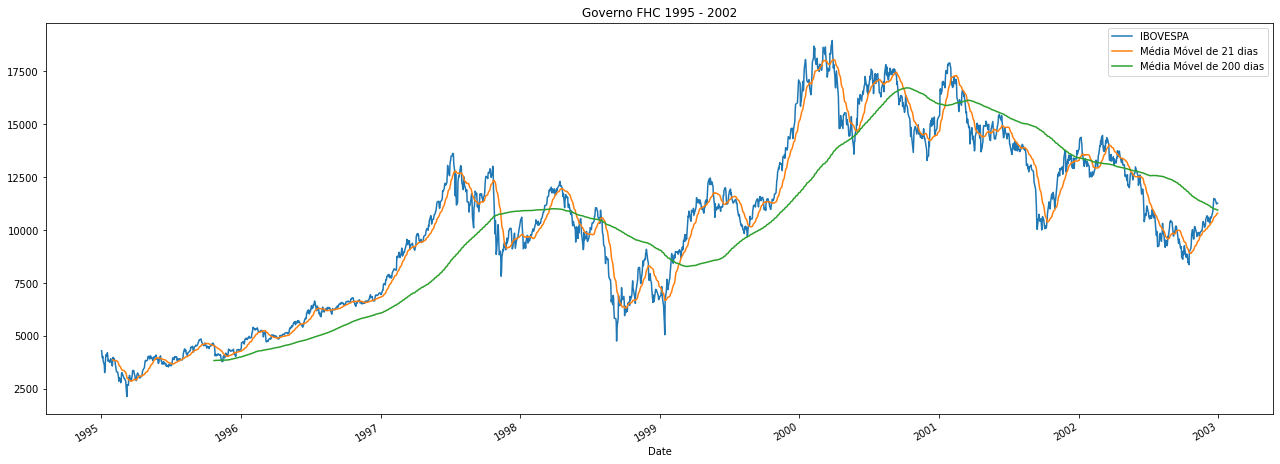

In [7]:
ibvsp_fhc = ibvsp[(ibvsp.index.year >= 1995) & (ibvsp.index.year <= 2002)] # indexação e filtragem do período
ibvsp_fhc['Fechamento'].plot(figsize=(22,8), label='IBOVESPA', grid=True, title='Governo FHC 1995 - 2002') # plotagem da coluna Fechamento no período
ibvsp_fhc['Fechamento'].rolling(21).mean().plot(label='Média Móvel de 21 dias') # plotagem da média móvel 21 dias no período
ibvsp_fhc['Fechamento'].rolling(200).mean().plot(label='Média Móvel de 200 dias') # plotagem da média móvel 200 dias no período
plt.legend();

#Análise dos Fechamentos das Cotações durante o Governo Lula

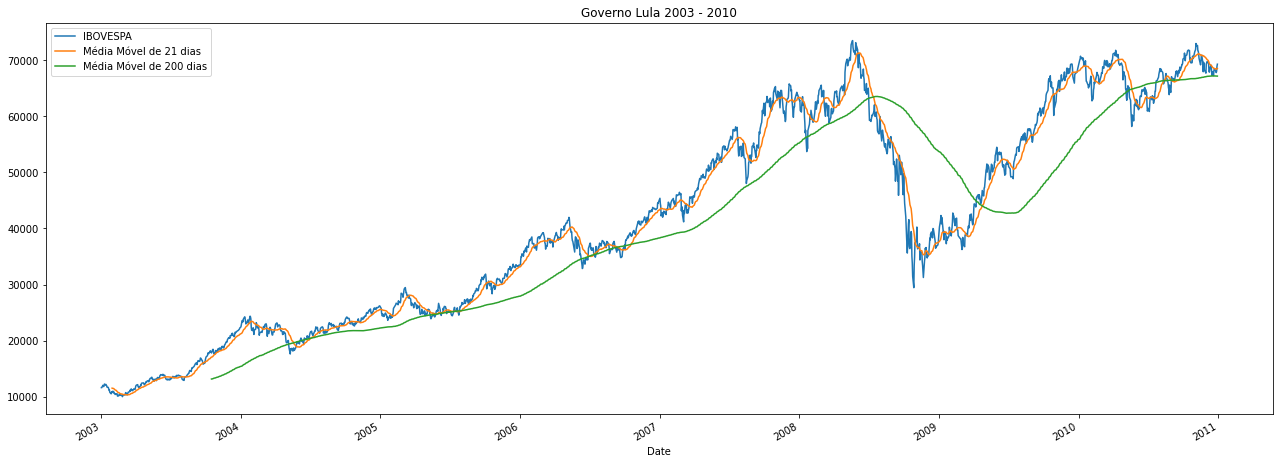

In [8]:
ibvsp_lula = ibvsp[(ibvsp.index.year >= 2003) & (ibvsp.index.year <= 2010)]
ibvsp_lula['Fechamento'].plot(figsize=(22,8), label='IBOVESPA', grid=True, title='Governo Lula 2003 - 2010')
ibvsp_lula['Fechamento'].rolling(21).mean().plot(label='Média Móvel de 21 dias')
ibvsp_lula['Fechamento'].rolling(200).mean().plot(label='Média Móvel de 200 dias')
plt.legend();

#Análise dos Fechamentos das Cotações durante o Governo Dilma

[*********************100%***********************]  1 of 1 completed


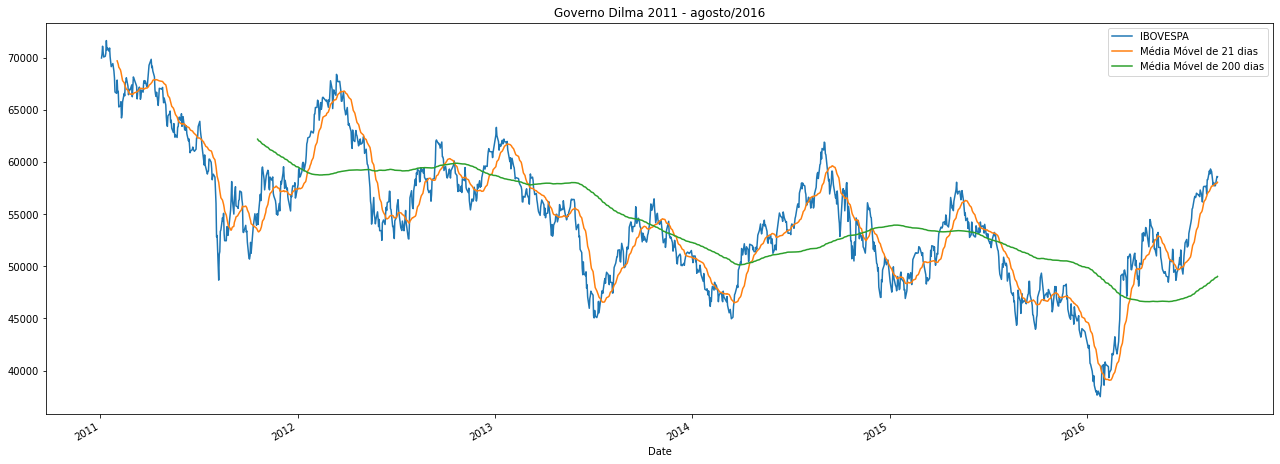

In [13]:
ibvsp_dilma = pddr.get_data_yahoo('^BVSP', start='2011-01-01', end='2016-08-31')
ibvsp_dilma['Close'].plot(figsize=(22,8), label='IBOVESPA', grid=True, title='Governo Dilma 2011 - agosto/2016')
ibvsp_dilma['Close'].rolling(21).mean().plot(label='Média Móvel de 21 dias')
ibvsp_dilma['Close'].rolling(200).mean().plot(label='Média Móvel de 200 dias')
plt.legend();

#Análise dos Fechamentos das Cotações durante o Governo Temer

[*********************100%***********************]  1 of 1 completed


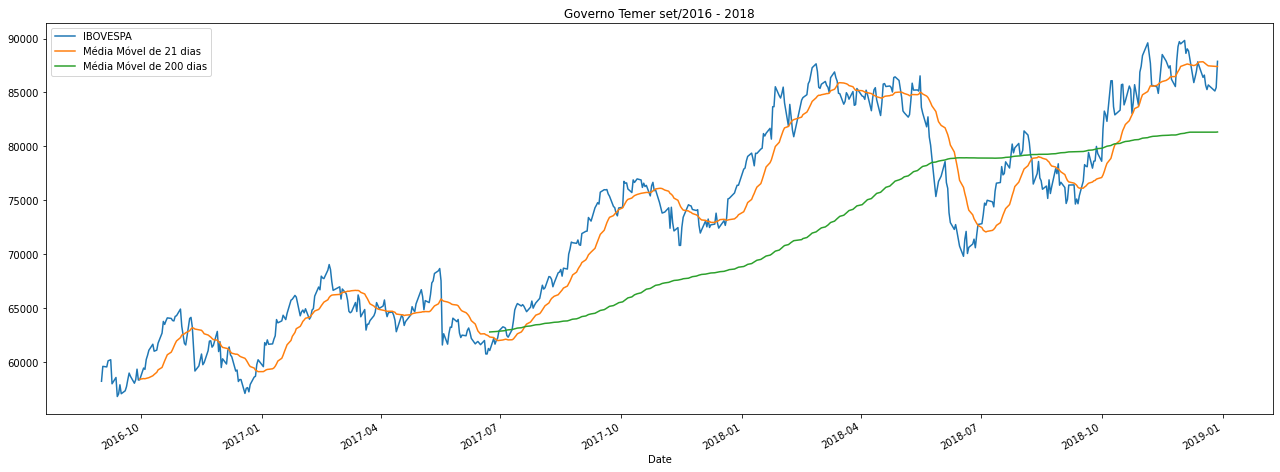

In [14]:
ibvsp_temer = pddr.get_data_yahoo('^BVSP', start='2016-09-01', end='2018-12-31')
ibvsp_temer['Close'].plot(figsize=(22,8), label='IBOVESPA', grid=True, title='Governo Temer set/2016 - 2018')
ibvsp_temer['Close'].rolling(21).mean().plot(label='Média Móvel de 21 dias')
ibvsp_temer['Close'].rolling(200).mean().plot(label='Média Móvel de 200 dias')
plt.legend();

#Análise dos Fechamentos das Cotações durante o Governo Bolsonaro

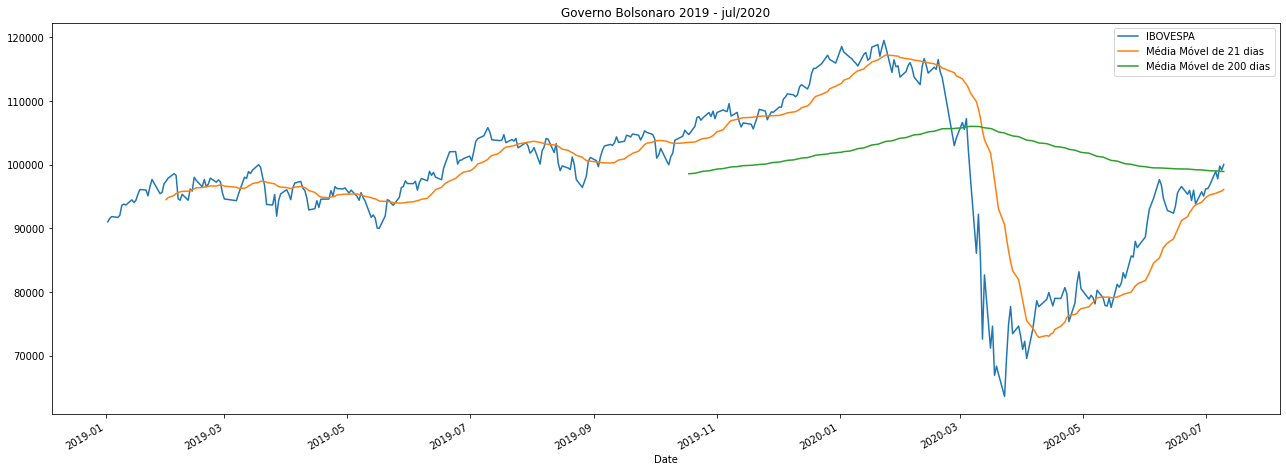

In [15]:
ibvsp_bolso = ibvsp[(ibvsp.index.year >= 2019) & (ibvsp.index.year <= 2020)]
ibvsp_bolso['Fechamento'].plot(figsize=(22,8), label='IBOVESPA', grid=True, title='Governo Bolsonaro 2019 - jul/2020')
ibvsp_bolso['Fechamento'].rolling(21).mean().plot(label='Média Móvel de 21 dias')
ibvsp_bolso['Fechamento'].rolling(200).mean().plot(label='Média Móvel de 200 dias')
plt.legend();